### Importing Required Python Libraries:-
- numpy
- pandas
- matplotlib.pyplot
- seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading dataset to initialze following:
1. Inspecting first few rows
2. Checking any Missing Values
3. Descriptive Statistics for numerical columns

In [2]:
#Loading Dataset and inspecting the data values involved
df=pd.read_csv("heart disease prediction.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
#Checking any Missing Values are present in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
#Descrptive Stastistics of dataset
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Performing Univariate , Bivariate and Multi variate analysis:

#### Univariate Analysis :

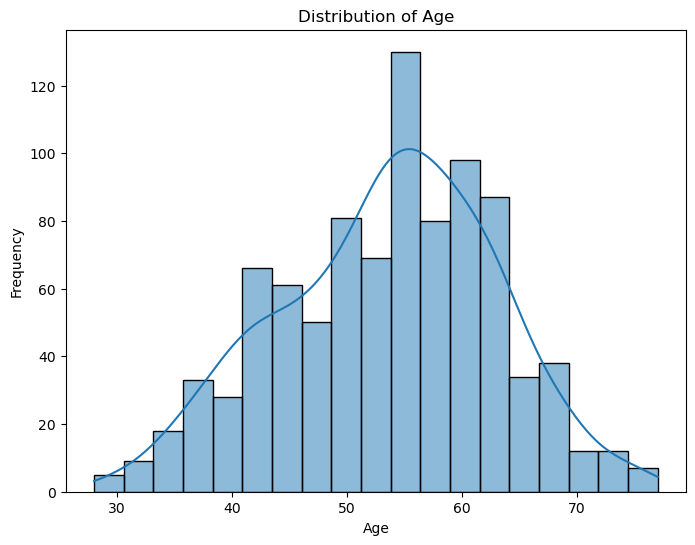

In [5]:
#Univariate Analysis for important features like Age, Cholestrol

plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

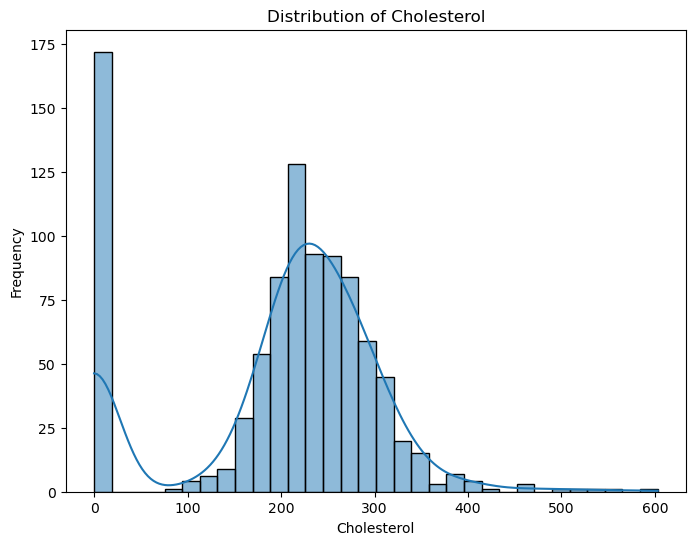

In [6]:
# Univariate Analysis for 'chol' (Cholesterol)
plt.figure(figsize=(8, 6))
sns.histplot(df['Cholesterol'], kde=True)
plt.title('Distribution of Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

#### Bivariate Analysis:

<Figure size 1000x600 with 0 Axes>

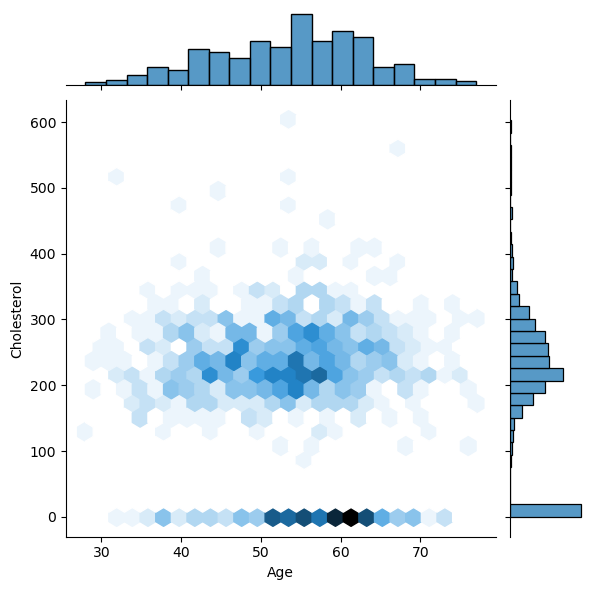

In [7]:
#Bivariate Analysis:  Age vs Cholestrol hexbin plot

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.jointplot(x='Age', y='Cholesterol', data=df, kind='hex')
plt.show()


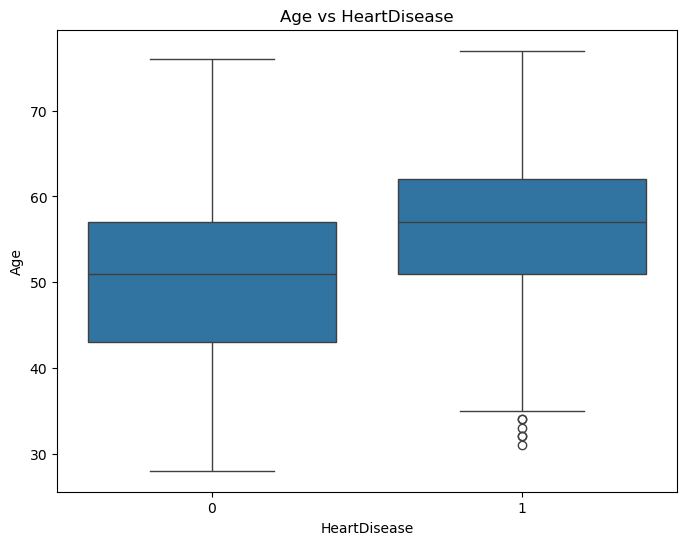

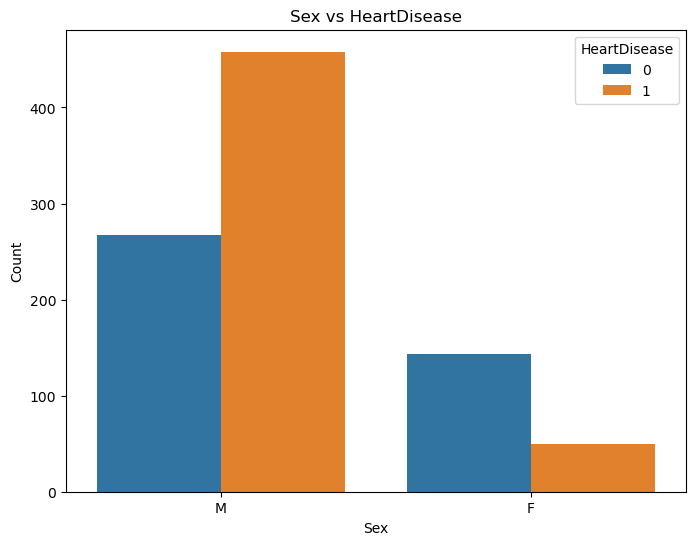

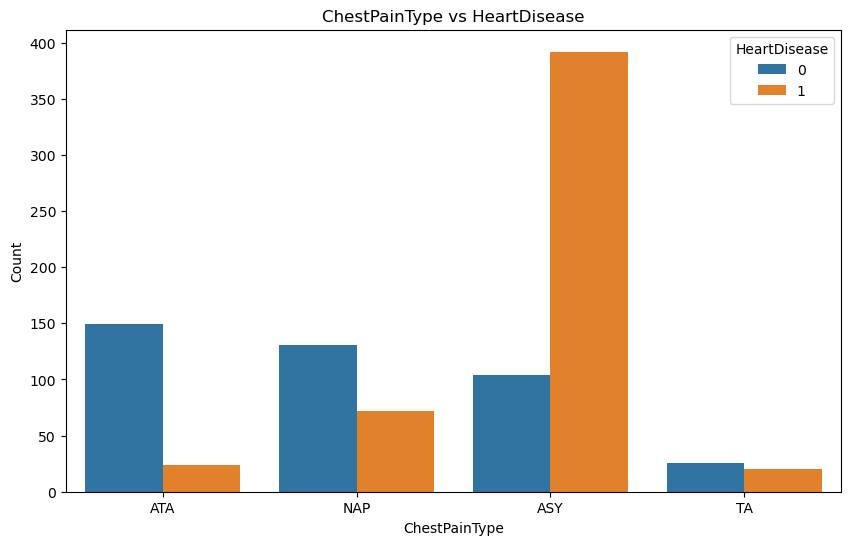

In [8]:
# Age vs HeartDisease: Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='HeartDisease', y='Age', data=df)
plt.title('Age vs HeartDisease')
plt.xlabel('HeartDisease')
plt.ylabel('Age')
plt.show()

# Sex vs HeartDisease: Bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='HeartDisease', data=df)
plt.title('Sex vs HeartDisease')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# ChestPainType vs HeartDisease: Count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='ChestPainType', hue='HeartDisease', data=df)
plt.title('ChestPainType vs HeartDisease')
plt.xlabel('ChestPainType')
plt.ylabel('Count')
plt.show()


#### MultiVariate Analysis:

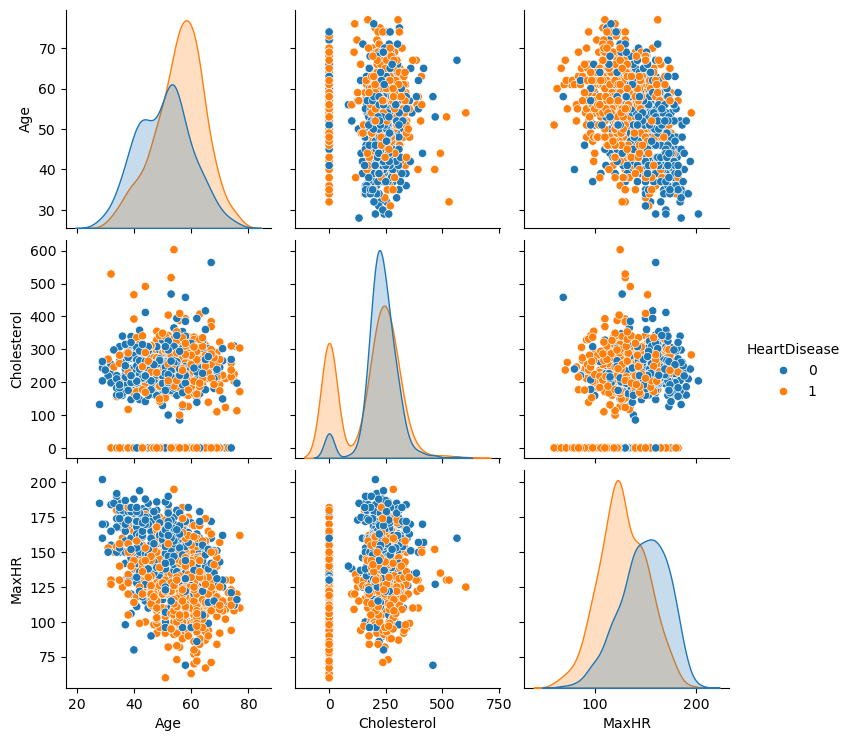

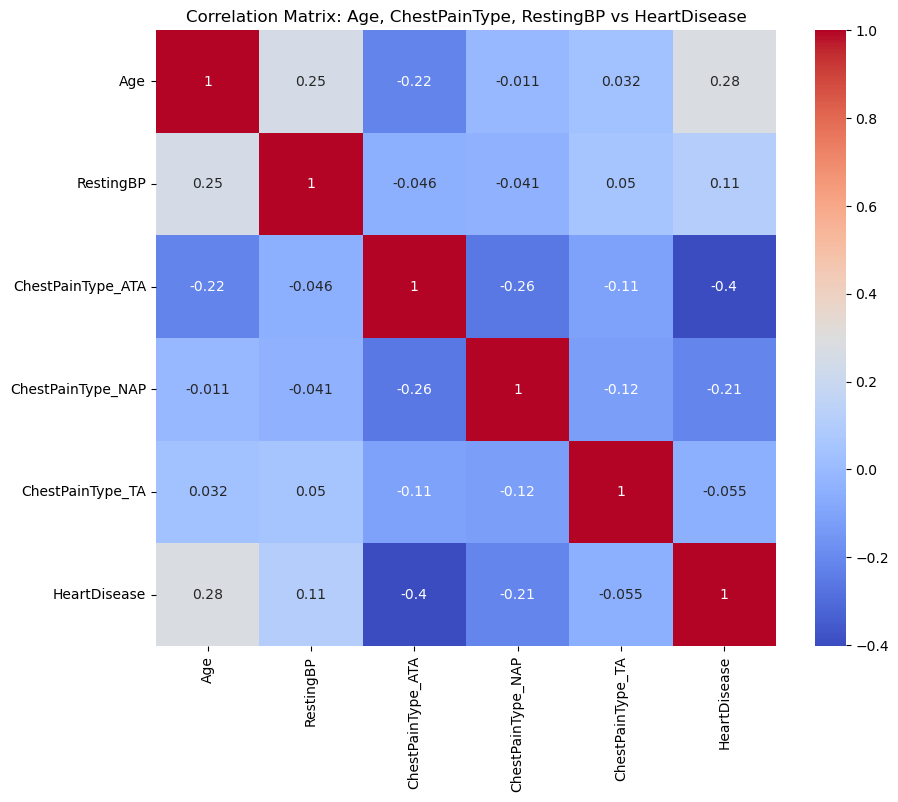

In [9]:
# Multivariate Analysis:
# Age, Cholesterol, MaxHR vs HeartDisease: Pairwise scatter plots
sns.pairplot(df[['Age', 'Cholesterol', 'MaxHR', 'HeartDisease']], hue='HeartDisease')
plt.show()

# Age, ChestPainType, RestingBP vs HeartDisease: Heatmap of correlations
# First, create dummy variables for ChestPainType
df_dummy = pd.get_dummies(df, columns=['ChestPainType'])
# Select the relevant columns
data_for_heatmap = df_dummy[['Age', 'RestingBP', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'HeartDisease']]
# Calculate the correlation matrix
corr_matrix = data_for_heatmap.corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Age, ChestPainType, RestingBP vs HeartDisease')
plt.show()


### Data preprocessing involves:-
- Encoding the categorical variables
- Removing the outliers
- Splitting datasets into Train and Test sets



In [10]:
#Converting Categorical through Label Encoding, One-hot Encoding
from sklearn.preprocessing import LabelEncoder
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # Male = 1, Female = 0
df['ExerciseAngina'] = LabelEncoder().fit_transform(df['ExerciseAngina'])  # Yes = 1, No = 0

# One-hot encoding for multi-class categorical variables
df = pd.get_dummies(df, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True)


In [11]:
# Detect and remove outliers in 'Cholesterol' using IQR
Q1 = df['Cholesterol'].quantile(0.25)
Q3 = df['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Cholesterol'] >= lower_bound) & (df['Cholesterol'] <= upper_bound)]


In [12]:
#Splitting Dataset for Training and Testing
from sklearn.model_selection import train_test_split

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Fitting the Model and Model Evaluation:

In [13]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
logreg = LogisticRegression(max_iter=1000)
# Train the model
logreg.fit(X_train, y_train)


C:\Users\Shiva\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [14]:
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8299319727891157


In [23]:
y_pred_train = logreg.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {train_accuracy}")

Train Accuracy: 0.8758503401360545


### Trying Other Models using Voting Classifier for better accuracy:

In [25]:
from sklearn.ensemble import VotingClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
estimators_list=[("KNN",KNeighborsClassifier()),("RF",RandomForestClassifier(max_depth=4)),("LR",LogisticRegression()),("NB",GaussianNB())]

In [27]:
model2=VotingClassifier(estimators_list)
model2.fit(X_train,y_train)

C:\Users\Shiva\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('KNN', KNeighborsClassifier()),
                             ('RF', RandomForestClassifier(max_depth=4)),
                             ('LR', LogisticRegression()),
                             ('NB', GaussianNB())])

In [29]:
y_pred2=model2.predict(X_test)

In [31]:
accuracy_score(y_test,y_pred2)

0.8571428571428571

In [33]:

y_pred_train2 = model2.predict(X_train)
train_accuracy2 = accuracy_score(y_train, y_pred_train2)
print(f"Train Accuracy: {train_accuracy2}")


Train Accuracy: 0.8843537414965986


### Saving the model in **.sav** format :

In [ ]:
#Save the model2

import pickle
filename = 'model2.sav'
pickle.dump(model2, open(filename, 'wb'))
